# Explorando a base dos Filmes

>Vamos importar uma nova base para nosso projeto, desta vez, copiando e colando o link do GitHub da base TMDB com uma série de filmes de diferentes línguas e com diversas características e lendo os primeiros cinco valores:

In [13]:
import pandas as pd
dadosTMDB = pd.read_csv("https://raw.githubusercontent.com/gitdowellington/primeiros-passos-data-science/refs/heads/main/1.analise-exploratoria/base-dados/tmdb_5000_movies.csv")
dadosTMDB.head()



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


> São muitos dados, não é mesmo? Vamos dar uma checada nos dados de receita (revenue) e orçamento (budget). Começando inicialmente com a distribuição das receitas dos filmes:

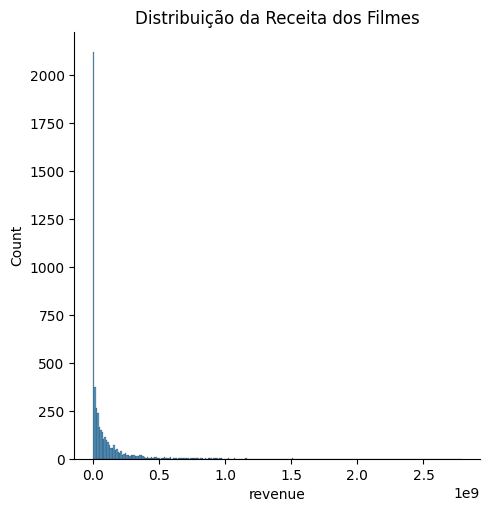

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(dadosTMDB['revenue'])
plt.title("Distribuição da Receita dos Filmes")
plt.show()

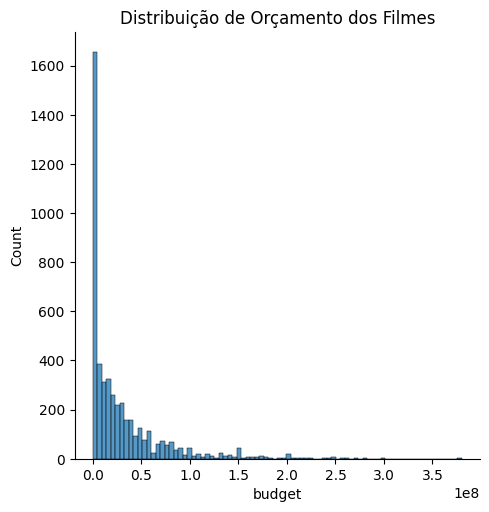

In [9]:
sns.displot(dadosTMDB['budget'])
plt.title("Distribuição de Orçamento dos Filmes")
plt.show()

#### **Método Info( )**

> - Uma coisa interessante que podemos fazer para compreender os dados que estamos trabalhando é por meio da utilização do método info( ), que traz um resumo de todas as colunas de nosso DataFrame. Com ele podemos saber a quantidade de registros e colunas, quantos dados não-nulos por coluna possuímos e o tipo dos dados:

In [14]:
dadosTMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

> Podemos observar durante a aula, uma grande quantidade de dados de receita com valor 0. Trataremos isso filtrando os dados só para receitas acima de 0 e recriaremos o histograma com a distribuição dos faturamentos:

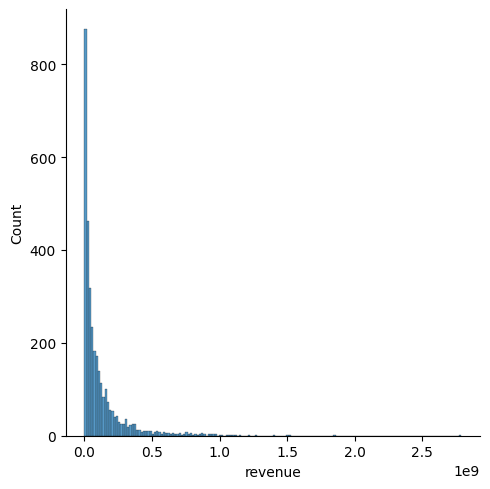

In [17]:
dadosTMDB_com_faturamento = dadosTMDB.query("revenue > 0")
sns.displot(dadosTMDB_com_faturamento['revenue'])

> Por fim, visualizamos, respectivamente, as diferentes línguas originais dos filmes em um array e contamos quantas vezes cada uma aparece.

In [18]:
dadosTMDB["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [19]:
dadosTMDB["original_language"].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
cs       2
ta       2
ro       2
ar       2
te       1
hu       1
xx       1
af       1
is       1
tr       1
vi       1
pl       1
nb       1
ky       1
no       1
sl       1
ps       1
el       1
Name: count, dtype: int64

> Pronto, agora é com você! Como podemos filtrar os dados para gerarmos um visual com a distribuição da média das notas do TMDB (vote_average) em que o número de votos (vote_count) seja maior que 10?

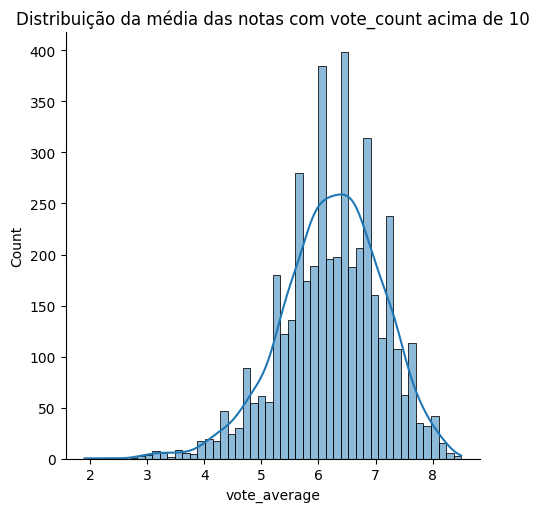

In [25]:
sns.displot(dadosTMDB.query("vote_count > 10")['vote_average'], kde = True)
plt.title("Distribuição da média das notas com vote_count acima de 10")
plt.show()